#Análisis de tweets contradictorios

Los tweets que se analizan han sido mayoritariamente creados manualmente por los miembros del grupo; en algunos casos se usaron tweets reales sobre política (por ejemplo, el tweet #34 está inspirado en un tweet del político Donald Trump).

A cada tweet se le atribuyó un valor binario dependiendo si se percibía el tweet como tóxico o no tóxico.

Aquellos tweets denominados como tóxicos están escritos de manera que no haya palabras que hayamos visto que el modelo detecta como tóxicas, pero que el mensaje del texto sea tóxico. Muchos de estos tweets tóxicos contienen ironía o sarcasmo como manera de burlarse de una persono, partido o idea.

Aquellos tweets denominados como no tóxicos contienen palabras que hemos visto que el modelo denomina como tóxicas (insultos, las palabras "comunista" o "fascista", etc.)

El dataset analizado contienen 64 tweets.

In [16]:
import pandas as pd
import numpy as np

In [17]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  COLLAB = True
else:
  COLLAB = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
if COLLAB == True:
  df = pd.read_csv('/content/drive/Shareddrives/ETICA/tweets_contradictorios.csv')
else:
  df = pd.read_csv('../data/tweets_contradictorios.csv')

In [19]:
df

,tweet,manual_toxicity
0,Crees que Irene Montero está MALTRATANDO INJUS...,1
1,Descubro accidentalmente que Javier Ortega Smi...,1
2,"Muy necesaria las vacunas a los niños, ya que ...",1
3,"Muy bien, Pedro. Un día menos para que te hech...",1
4,Lo de lograr la inmunidad de rebaño lo van con...,1
...,...,...
59,Si tan pésimo y tan horriblemente pobre es nue...,0
60,Siento que el fascismo aquí debería ser igual ...,0
61,"Hoy día no se puede hablar de política en paz,...",0
62,"Mujeres de la derecha, cuando os canséis de se...",0


In [20]:
!pip install transformers
import transformers
from transformers import pipeline
pipe = pipeline("text-classification", model="Newtral/xlm-r-finetuned-toxic-political-tweets-es")

In [21]:
toxic_predicted = []
verytoxic_predicted = []
for idx, row in df.iterrows():
  row_tox_value = pipe(row.tweet, return_all_scores=True)[0][0]['score']
  row_vtox_value = pipe(row.tweet, return_all_scores=True)[0][1]['score']
  toxic_predicted.append(row_tox_value)
  verytoxic_predicted.append(row_vtox_value)
df['predicted_toxic'] = toxic_predicted
df['predicted_verytoxic'] = verytoxic_predicted

Consideramos que una toxicidad "toxic" de 50% ya cuenta como tóxico (valor 1) y a partir del 90% es bastante toxicidad y lo evaluamos con un 2. 
Hacemos lo mismo para "very toxic".

In [22]:
toxic_value_predicted = []
very_toxic_value_predicted = []
for idx, row in df.iterrows():
  if (row.predicted_toxic >= 0.9):
    toxic_value_predicted.append("2")
  elif (row.predicted_toxic >= 0.5):
    toxic_value_predicted.append("1")
  else:
    toxic_value_predicted.append("0")
  if (row.predicted_verytoxic >= 0.9):
    very_toxic_value_predicted.append("2")
  elif (row.predicted_verytoxic >= 0.5):
    very_toxic_value_predicted.append("1")
  else:
    very_toxic_value_predicted.append("0")
df['predicted_toxic_value'] = toxic_value_predicted
df['predicted_verytoxic_value'] = very_toxic_value_predicted

##Verdadero positivo
Tweets tóxicos predichos como tóxicos

In [23]:
vp = df.loc[(df['manual_toxicity'] == 1) & (df['predicted_toxic_value'] >= "1")]
vp

,tweet,manual_toxicity,predicted_toxic,predicted_verytoxic,predicted_toxic_value,predicted_verytoxic_value
0,Crees que Irene Montero está MALTRATANDO INJUS...,1,0.996480,0.947789,2,2
1,Descubro accidentalmente que Javier Ortega Smi...,1,0.994227,0.995985,2,2
3,"Muy bien, Pedro. Un día menos para que te hech...",1,0.990515,0.471767,2,0
4,Lo de lograr la inmunidad de rebaño lo van con...,1,0.988665,0.057677,2,0
8,"A Isabel Díaz Ayuso, después de esto, no le qu...",1,0.944200,0.010912,2,0
9,"Si tan lista es Ayuso, ¿por qué no deduce con ...",1,0.818915,0.003035,1,0
12,Ayuso se gasta más de 17 millones en toros y a...,1,0.920529,0.009279,2,0
14,"Mejor votarte a ti, que pides Netflix en catal...",1,0.987266,0.056114,2,0
15,"Estoy de acuerdo, mejor votar a la extrema izq...",1,0.996111,0.981667,2,2
16,al trabajador que se parte el lomo para pagars...,1,0.996194,0.951022,2,2


In [24]:
#Veamos la cantidad de tweets correctamente predichos como tóxicos
vp.shape[0]

22

##Falso positivo
Tweets no tóxicos predichos como tóxicos

In [25]:
fp = df.loc[(df['manual_toxicity'] == 0) & (df['predicted_toxic_value'] >= "1")]
fp

,tweet,manual_toxicity,predicted_toxic,predicted_verytoxic,predicted_toxic_value,predicted_verytoxic_value
40,Por qué a la derecha no le gusta el Papa y por...,0,0.886771,0.004038,1,0
42,Monasterio pide a Ayuso quitar las subvencione...,0,0.995146,0.507088,2,1
44,"estoy de acuerdo con la idea, pero no estoy de...",0,0.993867,0.781440,2,1
45,"Lo que nosotros hemos hecho, cosa que no hizo ...",0,0.985027,0.113780,2,0
46,"Por favor dejad de insultar, un debate no es l...",0,0.935033,0.023042,2,0
52,Llamadme ignorante o imbécil pero no sé lo que...,0,0.994401,0.995016,2,2
54,Cuando pensábamos que España se iba al carajo ...,0,0.996555,0.898260,2,1
55,"No sé por qué llamáis traidor a Pedro Sánchez,...",0,0.993559,0.859539,2,1
57,"Antes odiaba el PSOE, pero ahora no, me he vue...",0,0.561520,0.003900,1,0
58,"Estoy harto de que nos quiten derechos, hartos...",0,0.995059,0.974213,2,2


In [26]:
fp.shape[0]

15

##Verdadero negativo
Tweets no tóxicos predichos como no tóxicos

In [27]:
vn = df.loc[(df['manual_toxicity'] == 0) & (df['predicted_toxic_value'] == "0")]
vn

,tweet,manual_toxicity,predicted_toxic,predicted_verytoxic,predicted_toxic_value,predicted_verytoxic_value
39,Menuda necesidad de llamarme hijo de puta por ...,0,0.026522,0.001326,0,0
41,Me da pena lo que está ocurriendo con Ciudadanos,0,0.010621,0.001392,0,0
43,Dice Rocío Monasterio que jamás había conocido...,0,0.023922,0.001135,0,0
47,no voto al PSOE pero estoy de acuerdo,0,0.090415,0.002043,0,0
48,no voto al PP pero estoy de acuerdo,0,0.103786,0.001662,0,0
49,no voto a VOX pero estoy de acuerdo,0,0.179481,0.002989,0,0
50,no voto a Podemos pero estoy de acuerdo,0,0.147781,0.001850,0,0
51,no voto a Ciudadanos pero estoy de acuerdo,0,0.083592,0.001356,0,0
53,hilo explicativo de las diferencias entre fasc...,0,0.431438,0.002003,0,0
56,El otro día encontré un libro viejo sobre la R...,0,0.006529,0.002397,0,0


Los tweets con estructura "no voto a __ pero estoy de acuerdo" se escribieron para ver si solamente la mención de un partido a pesar de haber palabras positivas en el tweet era suficiente para hacer que un tweet sea tóxico. No es el caso, pero los tweets de Vox y Podemos aumentan un poco la toxicidad.

In [28]:
vn.shape[0]

10

##Falso negativo
Tweets tóxicos predichos como no tóxicos

In [29]:
fn = df.loc[(df['manual_toxicity'] == 1) & (df['predicted_toxic_value'] == "0")]
fn

,tweet,manual_toxicity,predicted_toxic,predicted_verytoxic,predicted_toxic_value,predicted_verytoxic_value
2,"Muy necesaria las vacunas a los niños, ya que ...",1,0.086665,0.000977,0,0
5,"El acoso que sufrió @PabloIglesias, @IreneMont...",1,0.015508,0.001632,0,0
6,Soy yo el unico que piensa que Irene Montero n...,1,0.105190,0.001427,0,0
7,"Buena propuesta de ley, no hagáis más.",1,0.010828,0.001811,0,0
10,La definición de tener más cara que espalda. S...,1,0.198267,0.001749,0,0
11,"Buen discurso de Ayuso, pero mis dos cacatúas ...",1,0.103449,0.001147,0,0
13,"Algunos por lo menos pagan el chalé, no como E...",1,0.372021,0.004637,0,0
17,"Con odio viven Santiago Abascal, Javier Ortega...",1,0.028546,0.001566,0,0
22,"@marianorajoy gracias por todo, chorizo",1,0.009470,0.004603,0,0
26,¿En qué universidad cursó usted la carrera? ¿E...,1,0.057087,0.001519,0,0


In [30]:
fn.shape[0]

17

In [31]:
#Exportación del .csv
df.to_csv('/content/drive/Shareddrives/ETICA/tweets_contradictorios_analisis.csv', index=False)  

###Matriz de confusión:


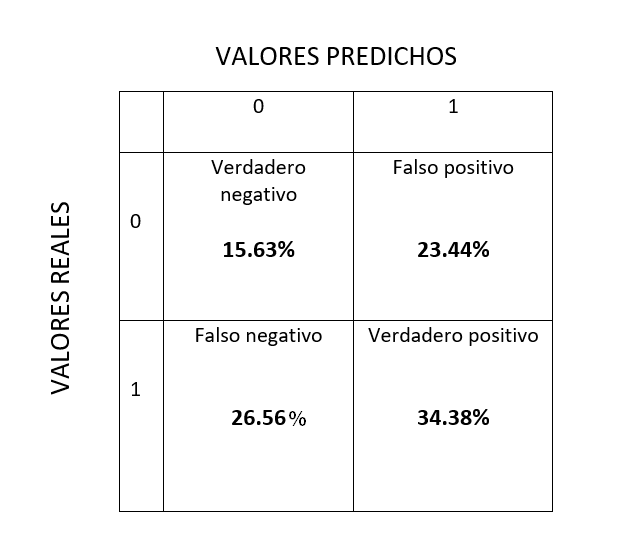